In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv(r"C:\Users\siddh\Downloads\H2HBABBA2503.csv")
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,CCU013,KRAFT F co,2019-06-28 00:00:00,2019.0,1.929373e+09,2019-05-23,20190523,20190523,20190523.0,USD,RV,1.0,NaN,15851.00,20190523.0,NAX2,1.929373e+09,0
1,U001,0200762301,C&S WH associates,2019-05-29 00:00:00,2019.0,1.929315e+09,2019-05-15,20190514,20190515,20190530.0,USD,RV,1.0,NaN,3901.05,20190515.0,NAC6,1.929315e+09,0
2,U001,CCU013,KRAFT F,2020-02-28 00:00:00,2020.0,1.930372e+09,2020-01-08,20200108,20200108,20200108.0,USD,RV,1.0,NaN,3698.20,20200108.0,NAX2,1.930372e+09,0
3,U001,0200555117,BURR co,2019-03-28 00:00:00,2019.0,1.928950e+09,2019-03-12,20190312,20190312,20190327.0,USD,RV,1.0,NaN,209.72,20190312.0,NAA8,1.928950e+09,0
4,U001,0200769623,WAL-MAR corporation,2019-10-28 00:00:00,2019.0,1.929994e+09,2019-10-11,20191009,20191011,20191026.0,USD,RV,1.0,NaN,205.36,20191011.0,NAH4,1.929994e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200795490,HY - co,2019-05-20 00:00:00,2019.0,1.929243e+09,2019-05-01,20190501,20190501,20190516.0,USD,RV,1.0,NaN,50114.71,20190501.0,NAA8,1.929243e+09,0
49996,U001,0200707822,PUBLI in,2020-02-04 00:00:00,2020.0,1.930398e+09,2020-01-20,20200114,20200120,20200204.0,USD,RV,1.0,NaN,30743.95,20200120.0,NAA8,1.930398e+09,0
49997,U001,0100031704,DELHAIZE co,NaN,2020.0,1.930820e+09,2020-04-24,20200424,20200424,20200509.0,USD,RV,1.0,NaN,59038.35,20200424.0,NAA8,1.930820e+09,1
49998,U001,0200744019,TARG systems,2020-01-24 00:00:00,2020.0,1.930380e+09,2020-01-10,20200109,20200110,20200125.0,USD,RV,1.0,NaN,57705.35,20200110.0,NAA8,1.930380e+09,0


# PREPROCESSING

In [3]:
main_train = df[df.clear_date.isnull()==False]
main_test = df[df.clear_date.isnull()]


In [4]:
main_train[main_train.invoice_id.isnull()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
4156,CA02,0140106054,TREE us,2019-05-31 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190306,20190316.0,CAD,X2,1.0,NaN,1570.59,20190306.0,CA10,NaN,0
19376,CA02,0140104429,COSTCO in,2019-05-22 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190322,20190401.0,CAD,X2,1.0,NaN,5353.20,20190322.0,CA10,NaN,0
38649,CA02,0140104223,H Y LO corporation,2019-05-08 00:00:00,2019.0,9.500000e+09,2019-04-30,20190430,20190329,20190408.0,CAD,X2,1.0,NaN,27816.00,20190329.0,CA10,NaN,0


In [5]:
main_train=main_train[main_train.invoice_id.isnull()==False]

In [6]:
main_train.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                    0
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             39997
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    0
isOpen                        0
dtype: int64

In [7]:
main_train.shape


(39997, 19)

In [8]:
main_test.shape

(10000, 19)

In [9]:
df["clear_date"].isnull().sum()

10000

# FEATURE ENGINEERING

In [10]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Length: 50000, dtype: bool

In [11]:
main_train.drop_duplicates(subset=None,keep='first',inplace=True)
main_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,CCU013,KRAFT F co,2019-06-28 00:00:00,2019.0,1.929373e+09,2019-05-23,20190523,20190523,20190523.0,USD,RV,1.0,NaN,15851.00,20190523.0,NAX2,1.929373e+09,0
1,U001,0200762301,C&S WH associates,2019-05-29 00:00:00,2019.0,1.929315e+09,2019-05-15,20190514,20190515,20190530.0,USD,RV,1.0,NaN,3901.05,20190515.0,NAC6,1.929315e+09,0
2,U001,CCU013,KRAFT F,2020-02-28 00:00:00,2020.0,1.930372e+09,2020-01-08,20200108,20200108,20200108.0,USD,RV,1.0,NaN,3698.20,20200108.0,NAX2,1.930372e+09,0
3,U001,0200555117,BURR co,2019-03-28 00:00:00,2019.0,1.928950e+09,2019-03-12,20190312,20190312,20190327.0,USD,RV,1.0,NaN,209.72,20190312.0,NAA8,1.928950e+09,0
4,U001,0200769623,WAL-MAR corporation,2019-10-28 00:00:00,2019.0,1.929994e+09,2019-10-11,20191009,20191011,20191026.0,USD,RV,1.0,NaN,205.36,20191011.0,NAH4,1.929994e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200793568,SUPE co,2019-01-31 00:00:00,2019.0,1.928619e+09,2019-01-13,20190114,20190113,20190128.0,USD,RV,1.0,NaN,603.10,20190113.0,NAA8,1.928619e+09,0
49995,U001,0200795490,HY - co,2019-05-20 00:00:00,2019.0,1.929243e+09,2019-05-01,20190501,20190501,20190516.0,USD,RV,1.0,NaN,50114.71,20190501.0,NAA8,1.929243e+09,0
49996,U001,0200707822,PUBLI in,2020-02-04 00:00:00,2020.0,1.930398e+09,2020-01-20,20200114,20200120,20200204.0,USD,RV,1.0,NaN,30743.95,20200120.0,NAA8,1.930398e+09,0
49998,U001,0200744019,TARG systems,2020-01-24 00:00:00,2020.0,1.930380e+09,2020-01-10,20200109,20200110,20200125.0,USD,RV,1.0,NaN,57705.35,20200110.0,NAA8,1.930380e+09,0


In [12]:
main_train['clear_date']=pd.to_datetime(main_train['clear_date'],format ='%Y-%m-%d %H:%M')
main_train['document_create_date']=pd.to_datetime(main_train['document_create_date'],format ='%Y%m%d')
main_train['document_create_date.1']=pd.to_datetime(main_train['document_create_date.1'],format ='%Y%m%d')
main_train['due_in_date']=pd.to_datetime(main_train['due_in_date'],format ='%Y%m%d')
main_train['posting_date']=pd.to_datetime(main_train['posting_date'],format ='%Y-%m-%d')
main_train['baseline_create_date']=pd.to_datetime(main_train['baseline_create_date'],format = '%Y%m%d')
main_train.shape
main_train


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,CCU013,KRAFT F co,2019-06-28,2019.0,1.929373e+09,2019-05-23,2019-05-23,2019-05-23,2019-05-23,USD,RV,1.0,NaN,15851.00,2019-05-23,NAX2,1.929373e+09,0
1,U001,0200762301,C&S WH associates,2019-05-29,2019.0,1.929315e+09,2019-05-15,2019-05-14,2019-05-15,2019-05-30,USD,RV,1.0,NaN,3901.05,2019-05-15,NAC6,1.929315e+09,0
2,U001,CCU013,KRAFT F,2020-02-28,2020.0,1.930372e+09,2020-01-08,2020-01-08,2020-01-08,2020-01-08,USD,RV,1.0,NaN,3698.20,2020-01-08,NAX2,1.930372e+09,0
3,U001,0200555117,BURR co,2019-03-28,2019.0,1.928950e+09,2019-03-12,2019-03-12,2019-03-12,2019-03-27,USD,RV,1.0,NaN,209.72,2019-03-12,NAA8,1.928950e+09,0
4,U001,0200769623,WAL-MAR corporation,2019-10-28,2019.0,1.929994e+09,2019-10-11,2019-10-09,2019-10-11,2019-10-26,USD,RV,1.0,NaN,205.36,2019-10-11,NAH4,1.929994e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200793568,SUPE co,2019-01-31,2019.0,1.928619e+09,2019-01-13,2019-01-14,2019-01-13,2019-01-28,USD,RV,1.0,NaN,603.10,2019-01-13,NAA8,1.928619e+09,0
49995,U001,0200795490,HY - co,2019-05-20,2019.0,1.929243e+09,2019-05-01,2019-05-01,2019-05-01,2019-05-16,USD,RV,1.0,NaN,50114.71,2019-05-01,NAA8,1.929243e+09,0
49996,U001,0200707822,PUBLI in,2020-02-04,2020.0,1.930398e+09,2020-01-20,2020-01-14,2020-01-20,2020-02-04,USD,RV,1.0,NaN,30743.95,2020-01-20,NAA8,1.930398e+09,0
49998,U001,0200744019,TARG systems,2020-01-24,2020.0,1.930380e+09,2020-01-10,2020-01-09,2020-01-10,2020-01-25,USD,RV,1.0,NaN,57705.35,2020-01-10,NAA8,1.930380e+09,0


In [13]:
main_train['delay']=(main_train['clear_date']-main_train['due_in_date']).dt.days

# EDA

In [14]:
main_train.sort_values(by=['posting_date'])
X = main_train.drop('delay',axis=1)
y = main_train['delay']
from sklearn.model_selection import train_test_split
X_train,X_inter_test,y_train,y_inter_test = train_test_split(X,y,test_size=0.3,random_state=0 , shuffle = False)
X_val,X_test,y_val,y_test = train_test_split(X_inter_test,y_inter_test,test_size=0.5,random_state=0 , shuffle = False)

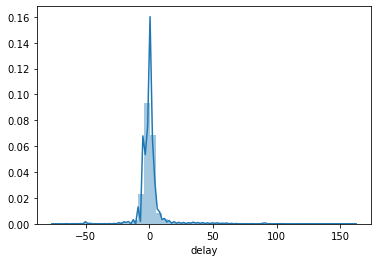

In [15]:
X_train.shape , X_val.shape , X_test.shape
import seaborn as sns
sns.distplot(y_train)


In [16]:
X_train.merge(y_train,on = X_train.index)

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,...,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
0,0,U001,CCU013,KRAFT F co,2019-06-28,2019.0,1.929373e+09,2019-05-23,2019-05-23,2019-05-23,...,USD,RV,1.0,NaN,15851.00,2019-05-23,NAX2,1.929373e+09,0,36
1,1,U001,0200762301,C&S WH associates,2019-05-29,2019.0,1.929315e+09,2019-05-15,2019-05-14,2019-05-15,...,USD,RV,1.0,NaN,3901.05,2019-05-15,NAC6,1.929315e+09,0,-1
2,2,U001,CCU013,KRAFT F,2020-02-28,2020.0,1.930372e+09,2020-01-08,2020-01-08,2020-01-08,...,USD,RV,1.0,NaN,3698.20,2020-01-08,NAX2,1.930372e+09,0,51
3,3,U001,0200555117,BURR co,2019-03-28,2019.0,1.928950e+09,2019-03-12,2019-03-12,2019-03-12,...,USD,RV,1.0,NaN,209.72,2019-03-12,NAA8,1.928950e+09,0,1
4,4,U001,0200769623,WAL-MAR corporation,2019-10-28,2019.0,1.929994e+09,2019-10-11,2019-10-09,2019-10-11,...,USD,RV,1.0,NaN,205.36,2019-10-11,NAH4,1.929994e+09,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27393,34708,U001,0200792734,MDV/ foundation,2019-06-13,2019.0,1.929402e+09,2019-05-30,2019-05-30,2019-05-30,...,USD,RV,1.0,NaN,41267.32,2019-05-30,NAA8,1.929402e+09,0,-1
27394,34709,U001,200726979,BJ'S,2019-06-24,2019.0,1.929456e+09,2019-06-08,2019-06-07,2019-06-08,...,USD,RV,1.0,NaN,132.24,2019-06-08,NAA8,1.929456e+09,0,1
27395,34712,U001,0200769623,WAL-MAR in,2020-02-07,2020.0,1.930417e+09,2020-01-23,2020-01-21,2020-01-23,...,USD,RV,1.0,NaN,15555.32,2020-01-23,NAH4,1.930417e+09,0,0
27396,34713,U001,0200744019,TARG co,2019-07-16,2019.0,1.929565e+09,2019-07-03,2019-07-02,2019-07-03,...,USD,RV,1.0,NaN,29868.07,2019-07-03,NAA8,1.929565e+09,0,-2


# SCATTER PLOT

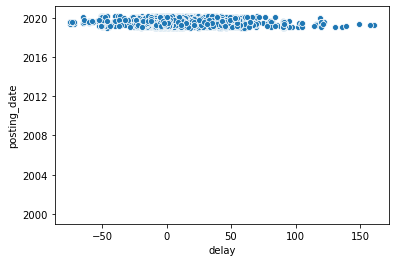

In [17]:
sns.scatterplot(data=X_train.merge(y_train,on = X_train.index), x="delay", y="posting_date")

# FEATURE SELECTION

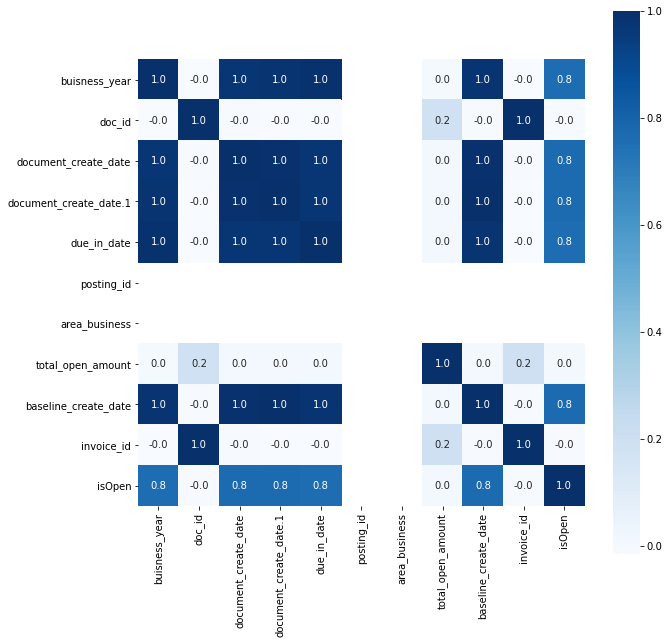

In [18]:
import matplotlib.pyplot as plt
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Blues')

In [19]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27398 entries, 0 to 34715
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           27398 non-null  object        
 1   cust_number             27398 non-null  object        
 2   name_customer           27398 non-null  object        
 3   clear_date              27398 non-null  datetime64[ns]
 4   buisness_year           27398 non-null  float64       
 5   doc_id                  27398 non-null  float64       
 6   posting_date            27398 non-null  datetime64[ns]
 7   document_create_date    27398 non-null  datetime64[ns]
 8   document_create_date.1  27398 non-null  datetime64[ns]
 9   due_in_date             27398 non-null  datetime64[ns]
 10  invoice_currency        27398 non-null  object        
 11  document type           27398 non-null  object        
 12  posting_id              27398 non-null  float6

In [20]:
X_train["posting_day"] =X_train["posting_date"].dt.day
X_train["posting_month"]=X_train["posting_date"].dt.month
X_train["posting_year"]=X_train["posting_date"].dt.year

In [21]:
X_val["posting_day"] =X_val["posting_date"].dt.day
X_val["posting_month"]=X_val["posting_date"].dt.month
X_val["posting_year"]=X_val["posting_date"].dt.year

In [22]:
X_test["posting_day"] =X_test["posting_date"].dt.day
X_test["posting_month"]=X_test["posting_date"].dt.month
X_test["posting_year"]=X_test["posting_date"].dt.year

In [23]:
X_train["document_create_day"] =X_train["document_create_date"].dt.day
X_train["document_create_month"]=X_train["document_create_date"].dt.month
X_train["document_create_year"]=X_train["document_create_date"].dt.year

In [24]:
X_val["document_create_day"] =X_val["document_create_date"].dt.day
X_val["document_create_month"]=X_val["document_create_date"].dt.month
X_val["document_create_year"]=X_val["document_create_date"].dt.year

In [25]:
X_test["document_create_day"] =X_test["document_create_date"].dt.day
X_test["document_create_month"]=X_test["document_create_date"].dt.month
X_test["document_create_year"]=X_test["document_create_date"].dt.year

In [26]:
X_train["document_create_date"]

0       2019-05-23
1       2019-05-14
2       2020-01-08
3       2019-03-12
4       2019-10-09
           ...    
34708   2019-05-30
34709   2019-06-07
34712   2020-01-21
34713   2019-07-02
34715   2019-01-09
Name: document_create_date, Length: 27398, dtype: datetime64[ns]

In [27]:
X_train["baseline_create_day"] =X_train["baseline_create_date"].dt.day
X_train["baseline_create_month"]=X_train["baseline_create_date"].dt.month
X_train["baseline_create_year"]=X_train["baseline_create_date"].dt.year

In [28]:
X_val["baseline_create_day"] =X_val["baseline_create_date"].dt.day
X_val["baseline_create_month"]=X_val["baseline_create_date"].dt.month
X_val["baseline_create_year"]=X_val["baseline_create_date"].dt.year

In [29]:
X_test["baseline_create_day"] =X_test["baseline_create_date"].dt.day
X_test["baseline_create_month"]=X_test["baseline_create_date"].dt.month
X_test["baseline_create_year"]=X_test["baseline_create_date"].dt.year

In [30]:
label_encoder = LabelEncoder()
  
X_train['invoice_currency']= label_encoder.fit_transform(X_train['invoice_currency'])
X_train['business_code']= label_encoder.fit_transform(X_train['business_code']) 
X_train['cust_number']= label_encoder.fit_transform(X_train['cust_number'])
X_train['name_customer']= label_encoder.fit_transform(X_train['name_customer'])
X_train['document type']= label_encoder.fit_transform(X_train['document type'])
X_train['cust_payment_terms']= label_encoder.fit_transform(X_train['cust_payment_terms'])

In [31]:
X_val['invoice_currency']= label_encoder.fit_transform(X_val['invoice_currency'])
X_val['business_code']= label_encoder.fit_transform(X_val['business_code']) 
X_val['cust_number']= label_encoder.fit_transform(X_val['cust_number'])
X_val['name_customer']= label_encoder.fit_transform(X_val['name_customer'])
X_val['document type']= label_encoder.fit_transform(X_val['document type'])
X_val['cust_payment_terms']= label_encoder.fit_transform(X_val['cust_payment_terms'])

In [32]:
X_test['invoice_currency']= label_encoder.fit_transform(X_test['invoice_currency'])
X_test['business_code']= label_encoder.fit_transform(X_test['business_code']) 
X_test['cust_number']= label_encoder.fit_transform(X_test['cust_number'])
X_test['name_customer']= label_encoder.fit_transform(X_test['name_customer'])
X_test['document type']= label_encoder.fit_transform(X_test['document type'])
X_test['cust_payment_terms']= label_encoder.fit_transform(X_test['cust_payment_terms'])

In [33]:
new=[ 'business_code', 'cust_number', 'name_customer',
       'buisness_year', 'doc_id', 'invoice_currency',
       'document type', 'posting_id', 'total_open_amount',
         'cust_payment_terms', 'isOpen',
       'posting_day', 'posting_month', 'posting_year', 'document_create_day',
       'document_create_month', 'document_create_year', 'baseline_create_day',
       'baseline_create_month', 'baseline_create_year']

# MODEL

# LINEAR REGRESSION

In [59]:
from sklearn.linear_model import LinearRegression
base_model = LinearRegression()
base_model.fit(X_train[new], y_train)

LinearRegression()

In [60]:
y_predict = base_model.predict(X_val[new])

In [61]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_val, y_predict, squared=False)

11.285733715216546

In [62]:
met = pd.DataFrame(zip(y_predict , y_test),columns=['Predicted','Actuals'])

In [63]:
(abs(met.Predicted-met.Actuals)/met.Actuals).mean()

inf

# TREE BASED MODEL

In [34]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0 , max_depth=5)

In [35]:
regressor.fit(X_train[new], y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [36]:
X_train.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen',
       'posting_day', 'posting_month', 'posting_year', 'document_create_day',
       'document_create_month', 'document_create_year', 'baseline_create_day',
       'baseline_create_month', 'baseline_create_year'],
      dtype='object')

In [37]:
X_train.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                    0
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             27398
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    0
isOpen                        0
posting_day                   0
posting_month                 0
posting_year                  0
document_create_day           0
document_create_month         0
document_create_year          0
baseline_create_day           0
baseline_create_month         0
baseline_create_year          0
dtype: int64

In [38]:
from sklearn.metrics import mean_squared_error
y_predict2 = regressor.predict(X_val[new])
mean_squared_error(y_val, y_predict2, squared=False)
y_predict_test = regressor.predict(X_test[new])
mean_squared_error(y_test, y_predict_test, squared=False)
MSE_Score=[]
MSE_Score.append(mean_squared_error(y_val, y_predict2))
MSE_Score

[140.87786442796624]

# PREDICTION PROCESS

In [39]:
main_test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
10,U001,0200758531,BRENH corp,NaN,2020.0,1.930724e+09,2020-03-31,20200331,20200331,20200415.0,USD,RV,1.0,NaN,37381.28,20200331.0,NAA8,1.930724e+09,1
11,U001,0200706844,WINC foundation,NaN,2020.0,1.930815e+09,2020-04-22,20200422,20200422,20200507.0,USD,RV,1.0,NaN,44764.48,20200422.0,NAA8,1.930815e+09,1
17,U001,0200726979,BJ'S corp,NaN,2020.0,1.930642e+09,2020-03-12,20200311,20200312,20200327.0,USD,RV,1.0,NaN,130.04,20200312.0,NAA8,1.930642e+09,1
21,U001,200726979,BJ'S in,NaN,2020.0,1.930669e+09,2020-03-19,20200318,20200319,20200403.0,USD,RV,1.0,NaN,1334.24,20200319.0,NAA8,1.930669e+09,1
23,U001,0200769623,WAL-MAR foundation,NaN,2020.0,1.930746e+09,2020-04-04,20200404,20200404,20200419.0,USD,RV,1.0,NaN,13283.06,20200404.0,NAH4,1.930746e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49983,U001,0200752302,KROGER foundation,NaN,2020.0,1.930583e+09,2020-02-28,20200229,20200228,20200503.0,USD,RV,1.0,NaN,664.47,20200228.0,NAGD,1.930583e+09,1
49984,U001,0200936373,SUPE us,NaN,2020.0,1.930876e+09,2020-05-07,20200507,20200507,20200522.0,USD,RV,1.0,NaN,84648.30,20200507.0,NAA8,1.930876e+09,1
49989,CA02,0140106099,SOCIETE foundation,NaN,2020.0,2.960625e+09,2020-04-01,20200401,20200401,20200413.0,CAD,RV,1.0,NaN,52211.10,20200403.0,CA10,2.960625e+09,1
49991,U001,0200780383,MEIJ corporation,NaN,2020.0,1.930690e+09,2020-03-23,20200324,20200323,20200407.0,USD,RV,1.0,NaN,9191.19,20200323.0,NAA8,1.930690e+09,1


In [40]:
main_test.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             10000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    0
isOpen                        0
dtype: int64

In [41]:
X_main_test = main_test.drop(['area_business'],axis=1)
X_main_test
#main_test.drop(['Price'], inplace =True,axis=1)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
10,U001,0200758531,BRENH corp,NaN,2020.0,1.930724e+09,2020-03-31,20200331,20200331,20200415.0,USD,RV,1.0,37381.28,20200331.0,NAA8,1.930724e+09,1
11,U001,0200706844,WINC foundation,NaN,2020.0,1.930815e+09,2020-04-22,20200422,20200422,20200507.0,USD,RV,1.0,44764.48,20200422.0,NAA8,1.930815e+09,1
17,U001,0200726979,BJ'S corp,NaN,2020.0,1.930642e+09,2020-03-12,20200311,20200312,20200327.0,USD,RV,1.0,130.04,20200312.0,NAA8,1.930642e+09,1
21,U001,200726979,BJ'S in,NaN,2020.0,1.930669e+09,2020-03-19,20200318,20200319,20200403.0,USD,RV,1.0,1334.24,20200319.0,NAA8,1.930669e+09,1
23,U001,0200769623,WAL-MAR foundation,NaN,2020.0,1.930746e+09,2020-04-04,20200404,20200404,20200419.0,USD,RV,1.0,13283.06,20200404.0,NAH4,1.930746e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49983,U001,0200752302,KROGER foundation,NaN,2020.0,1.930583e+09,2020-02-28,20200229,20200228,20200503.0,USD,RV,1.0,664.47,20200228.0,NAGD,1.930583e+09,1
49984,U001,0200936373,SUPE us,NaN,2020.0,1.930876e+09,2020-05-07,20200507,20200507,20200522.0,USD,RV,1.0,84648.30,20200507.0,NAA8,1.930876e+09,1
49989,CA02,0140106099,SOCIETE foundation,NaN,2020.0,2.960625e+09,2020-04-01,20200401,20200401,20200413.0,CAD,RV,1.0,52211.10,20200403.0,CA10,2.960625e+09,1
49991,U001,0200780383,MEIJ corporation,NaN,2020.0,1.930690e+09,2020-03-23,20200324,20200323,20200407.0,USD,RV,1.0,9191.19,20200323.0,NAA8,1.930690e+09,1


In [42]:
label_encoder = LabelEncoder()
#X_main_test['invoice_currency']= label_encoder.fit_transform(X_main_test['invoice_currency'])
X_main_test['business_code']= label_encoder.fit_transform(X_main_test['business_code']) 
X_main_test['cust_number']= label_encoder.fit_transform(X_main_test['cust_number'])
X_main_test['name_customer']= label_encoder.fit_transform(X_main_test['name_customer'])
X_main_test['document type']= label_encoder.fit_transform(X_main_test['document type'])
X_main_test['invoice_currency']= label_encoder.fit_transform(X_main_test['invoice_currency'])
X_main_test['cust_payment_terms']= label_encoder.fit_transform(X_main_test['cust_payment_terms'])

In [43]:
X_main_test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
10,1,382,208,NaN,2020.0,1.930724e+09,2020-03-31,20200331,20200331,20200415.0,1,0,1.0,37381.28,20200331.0,15,1.930724e+09,1
11,1,305,1720,NaN,2020.0,1.930815e+09,2020-04-22,20200422,20200422,20200507.0,1,0,1.0,44764.48,20200422.0,15,1.930815e+09,1
17,1,337,182,NaN,2020.0,1.930642e+09,2020-03-12,20200311,20200312,20200327.0,1,0,1.0,130.04,20200312.0,15,1.930642e+09,1
21,1,581,185,NaN,2020.0,1.930669e+09,2020-03-19,20200318,20200319,20200403.0,1,0,1.0,1334.24,20200319.0,15,1.930669e+09,1
23,1,402,1679,NaN,2020.0,1.930746e+09,2020-04-04,20200404,20200404,20200419.0,1,0,1.0,13283.06,20200404.0,30,1.930746e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49983,1,373,867,NaN,2020.0,1.930583e+09,2020-02-28,20200229,20200228,20200503.0,1,0,1.0,664.47,20200228.0,29,1.930583e+09,1
49984,1,486,1468,NaN,2020.0,1.930876e+09,2020-05-07,20200507,20200507,20200522.0,1,0,1.0,84648.30,20200507.0,15,1.930876e+09,1
49989,0,164,1416,NaN,2020.0,2.960625e+09,2020-04-01,20200401,20200401,20200413.0,0,0,1.0,52211.10,20200403.0,3,2.960625e+09,1
49991,1,421,1003,NaN,2020.0,1.930690e+09,2020-03-23,20200324,20200323,20200407.0,1,0,1.0,9191.19,20200323.0,15,1.930690e+09,1


In [44]:
X_main_test['clear_date']=pd.to_datetime(X_main_test['clear_date'],format ='%Y%m%d')
X_main_test['posting_date']=pd.to_datetime(X_main_test['posting_date'],format ='%Y-%m-%d')
X_main_test['document_create_date']=pd.to_datetime(X_main_test['document_create_date'],format ='%Y%m%d')
X_main_test['document_create_date.1']=pd.to_datetime(X_main_test['document_create_date.1'],format ='%Y%m%d')
X_main_test['due_in_date']=pd.to_datetime(X_main_test['due_in_date'],format ='%Y%m%d')
X_main_test['baseline_create_date']=pd.to_datetime(X_main_test['baseline_create_date'],format ='%Y%m%d')

In [45]:
X_main_test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
10,1,382,208,NaT,2020.0,1.930724e+09,2020-03-31,2020-03-31,2020-03-31,2020-04-15,1,0,1.0,37381.28,2020-03-31,15,1.930724e+09,1
11,1,305,1720,NaT,2020.0,1.930815e+09,2020-04-22,2020-04-22,2020-04-22,2020-05-07,1,0,1.0,44764.48,2020-04-22,15,1.930815e+09,1
17,1,337,182,NaT,2020.0,1.930642e+09,2020-03-12,2020-03-11,2020-03-12,2020-03-27,1,0,1.0,130.04,2020-03-12,15,1.930642e+09,1
21,1,581,185,NaT,2020.0,1.930669e+09,2020-03-19,2020-03-18,2020-03-19,2020-04-03,1,0,1.0,1334.24,2020-03-19,15,1.930669e+09,1
23,1,402,1679,NaT,2020.0,1.930746e+09,2020-04-04,2020-04-04,2020-04-04,2020-04-19,1,0,1.0,13283.06,2020-04-04,30,1.930746e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49983,1,373,867,NaT,2020.0,1.930583e+09,2020-02-28,2020-02-29,2020-02-28,2020-05-03,1,0,1.0,664.47,2020-02-28,29,1.930583e+09,1
49984,1,486,1468,NaT,2020.0,1.930876e+09,2020-05-07,2020-05-07,2020-05-07,2020-05-22,1,0,1.0,84648.30,2020-05-07,15,1.930876e+09,1
49989,0,164,1416,NaT,2020.0,2.960625e+09,2020-04-01,2020-04-01,2020-04-01,2020-04-13,0,0,1.0,52211.10,2020-04-03,3,2.960625e+09,1
49991,1,421,1003,NaT,2020.0,1.930690e+09,2020-03-23,2020-03-24,2020-03-23,2020-04-07,1,0,1.0,9191.19,2020-03-23,15,1.930690e+09,1


In [46]:
X_main_test["posting_day"] =X_main_test["posting_date"].dt.day
X_main_test["posting_month"]=X_main_test["posting_date"].dt.month
X_main_test["posting_year"]=X_main_test["posting_date"].dt.year

In [47]:
X_main_test["document_create_day"] =X_main_test["document_create_date"].dt.day
X_main_test["document_create_month"]=X_main_test["document_create_date"].dt.month
X_main_test["document_create_year"]=X_main_test["document_create_date"].dt.year

In [48]:
X_main_test["baseline_create_day"] =X_main_test["baseline_create_date"].dt.day
X_main_test["baseline_create_month"]=X_main_test["baseline_create_date"].dt.month
X_main_test["baseline_create_year"]=X_main_test["baseline_create_date"].dt.year

# FINAL 

In [49]:
final_result=regressor.predict(X_main_test[new])
final_result

array([0.87299542, 0.87299542, 0.87299542, ..., 3.24694105, 0.87299542,
       0.87299542])

In [50]:
final_result = pd.Series(final_result,name='Delay')

In [51]:
X_main_test.reset_index(drop=True,inplace=True)

In [53]:
Final_dataset["due_in_date"]=pd.to_datetime(Final_dataset["due_in_date"],format="%Y%m%d")
Final_dataset["Pridicted_date"]=Final_dataset["due_in_date"] + pd.to_timedelta(Final_dataset["Delay"], unit='d')

In [54]:
Final_dataset["Pridicted_date"]=Final_dataset["Pridicted_date"].astype("str").str[:11]
Final_dataset

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,...,posting_month,posting_year,document_create_day,document_create_month,document_create_year,baseline_create_day,baseline_create_month,baseline_create_year,Delay,Pridicted_date
0,0,1,382,208,NaT,2020.0,1.930724e+09,2020-03-31,2020-03-31,2020-03-31,...,3,2020,31,3,2020,31,3,2020,0.872995,2020-04-15
1,1,1,305,1720,NaT,2020.0,1.930815e+09,2020-04-22,2020-04-22,2020-04-22,...,4,2020,22,4,2020,22,4,2020,0.872995,2020-05-07
2,2,1,337,182,NaT,2020.0,1.930642e+09,2020-03-12,2020-03-11,2020-03-12,...,3,2020,11,3,2020,12,3,2020,0.872995,2020-03-27
3,3,1,581,185,NaT,2020.0,1.930669e+09,2020-03-19,2020-03-18,2020-03-19,...,3,2020,18,3,2020,19,3,2020,0.872995,2020-04-03
4,4,1,402,1679,NaT,2020.0,1.930746e+09,2020-04-04,2020-04-04,2020-04-04,...,4,2020,4,4,2020,4,4,2020,7.682968,2020-04-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,1,373,867,NaT,2020.0,1.930583e+09,2020-02-28,2020-02-29,2020-02-28,...,2,2020,29,2,2020,28,2,2020,7.682968,2020-05-10
9996,9996,1,486,1468,NaT,2020.0,1.930876e+09,2020-05-07,2020-05-07,2020-05-07,...,5,2020,7,5,2020,7,5,2020,0.872995,2020-05-22
9997,9997,0,164,1416,NaT,2020.0,2.960625e+09,2020-04-01,2020-04-01,2020-04-01,...,4,2020,1,4,2020,3,4,2020,3.246941,2020-04-16
9998,9998,1,421,1003,NaT,2020.0,1.930690e+09,2020-03-23,2020-03-24,2020-03-23,...,3,2020,24,3,2020,23,3,2020,0.872995,2020-04-07
